In [ ]:
import pandas as pd
import numpy as np

# Importing Dataset

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.drop_duplicates(subset = 'Species')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


# Outlier Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

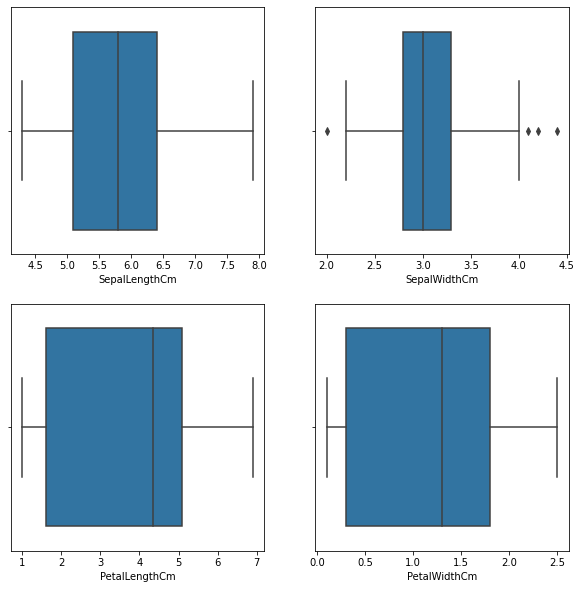

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.boxplot(x='SepalLengthCm',data = df)
 
plt.subplot(222)
sns.boxplot(x='SepalWidthCm',data = df)
 
plt.subplot(223)
sns.boxplot(x='PetalLengthCm',data = df)
 
plt.subplot(224)
sns.boxplot(x='PetalWidthCm',data = df)
 
plt.show()

In [ ]:
#SepalWidthCM has Outliers
q1 = np.percentile(df['SepalWidthCm'],25,interpolation = 'midpoint')
q3 = np.percentile(df['SepalWidthCm'],75,interpolation = 'midpoint')
iqr = q3 - q1
up = np.where(df['SepalWidthCm'] >= (q3+1.5*iqr))
low = np.where(df['SepalWidthCm'] <= (q1-1.5*iqr))

df.drop(up[0], inplace = True)
df.drop(low[0], inplace = True)
print("Updated shape:", df.shape)

Updated shape: (146, 6)


# Label Encoding


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
print('After Renaming:\n',df.head())

After Renaming:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


# Selecting Dependent & Independent Variables


In [ ]:
x = df.iloc[:,:5].values
y = df.iloc[:,5].values


# Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size = 0.3, random_state=500)
print("X-Train:", x_tr.shape)
print("Y-Train:", y_tr.shape)
print("X-Test:", x_te.shape)
print("Y-Test:", x_te.shape)

X-Train: (102, 5)
Y-Train: (102,)
X-Test: (44, 5)
Y-Test: (44, 5)


# Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(x_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

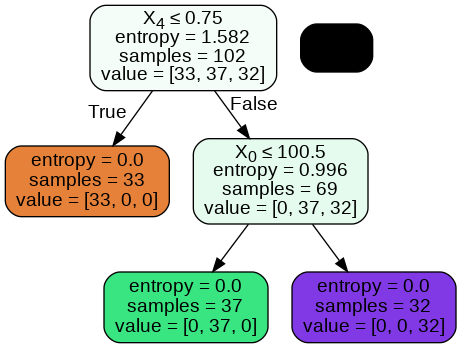

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),width = 500, height = 500)

# Model Prediction

In [ ]:
predict = tree.predict(x_te)
predict

array([2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0])

# Performance Metric



In [ ]:
from sklearn import metrics

print('accucary:', metrics.accuracy_score(y_te,predict))

accucary: 1.0


In [ ]:
print(metrics.classification_report(y_te,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        18

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

